# Counterfeit banknote detection algorithm

## Summary
    
* [Dataset preparation](#chapitre1)
        
     * [Import librairies](#section1.1)
     * [Import DataFrame](#section1.2)
     * [DataFrame processing](#section1.3)
     
* [Replace missing values](#chapitre2)

     * [Multiple linear regression](#section2.1)  
     * [Applying regression](#section2.2) 
     * [Analysis of regression performance](#section2.3)

* [Clustering](#chapitre3)

     * [Creation of a DataFrame train and test](#section3.1)
     * [PCA](#section3.2)
     * [Correlation graph](#section3.3)
     * [Projection](#section3.4)
     * [K-means](#section3.5)

* [Visualisation](#chapitre4)

     * [Confusion matrix : k-means](#section4.1)
     
* [Logistic regression](#chapitre5)

     * [Predictions](#section5.1)
     * [Accuracy](#section5.2)
     * [Confusion matrix : logistic regression](#section5.3)
     
* [TEST](#chapitre6)

## 1. Dataset preparation<a class="anchor" id="chapitre1"></a>

### 1.1 Import librairies<a class="anchor" id="section1.1"></a>

In [1]:
# Import librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

### 1.2 Import DataFrame<a class="anchor" id="section1.2"></a>

In [2]:
# Import csv file
billet = pd.read_csv('/Users/antoinebergounhe/Desktop/Openclassroom/Projet 10/billets.csv', sep=';')
billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


### 1.3 DataFrame processing<a class="anchor" id="section1.3"></a>

In [3]:
# Replace values 'True' and 'False' by '1' and '0'
billet['is_genuine'] = billet['is_genuine'].replace({True: 1, False: 0})

In [4]:
# Create a copy of the original DataFrame
billet_reglin_multiple = billet.copy()

In [5]:
# New dataframe without null values
data_clean = billet_reglin_multiple.dropna()

#### Correlation matrix

<AxesSubplot:>

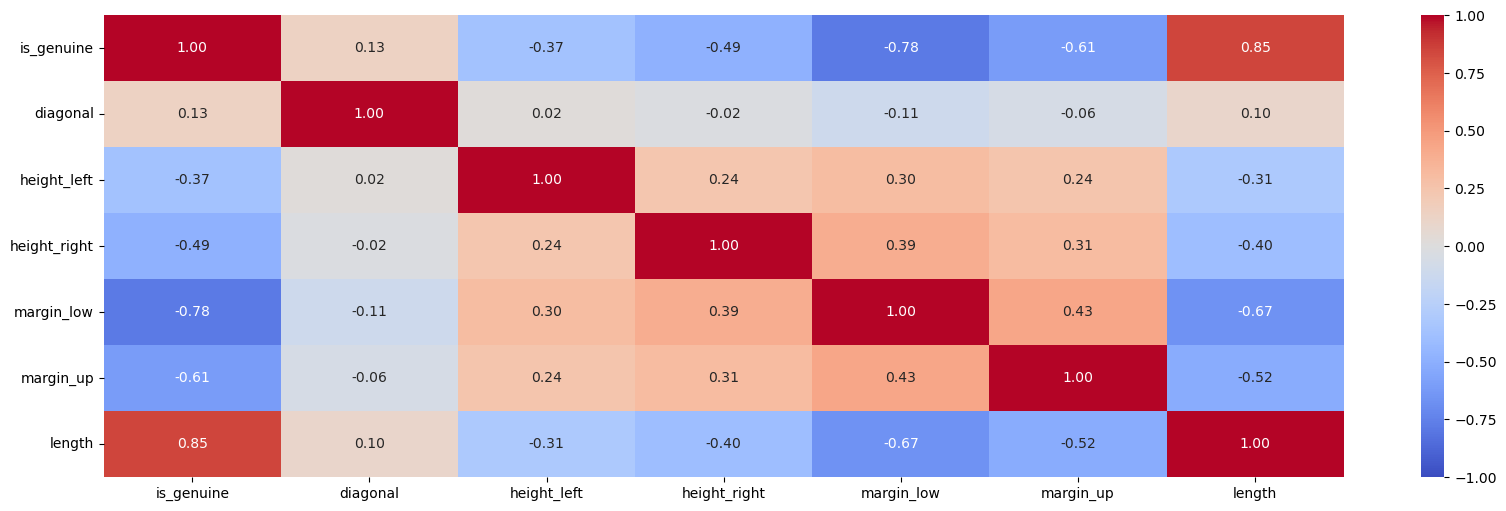

In [6]:
# Correlation matrix calculation
matrice = data_clean.corr()

# Create a figure
fig, ax = plt.subplots(figsize=(20, 6))

# Draw the heatmap with the minimum and maximum values
sns.heatmap(matrice, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

## 2. Replace missing values<a class="anchor" id="chapitre2"></a>

### 2.1 Multiple linear regression<a class="anchor" id="section2.1"></a>

In [7]:
# Run a multiple linear regression with 'margin_low' as the dependent variable
# and 'is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length' as independent variables
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=billet_reglin_multiple).fit()

# Display a short result
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          4.75e-299
Time:                        11:24:59   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8668      8.316      0.345   

In [8]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=billet_reglin_multiple).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          2.12e-300
Time:                        11:24:59   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.4247      7.873      0.308   

In [9]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=billet_reglin_multiple).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          8.76e-302
Time:                        11:24:59   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3902      5.476      0.071   

In [10]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+margin_up', data=billet_reglin_multiple).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          3.63e-303
Time:                        11:24:59   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.9104      4.035      0.721      

In [11]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=billet_reglin_multiple).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          1.24e-304
Time:                        11:24:59   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9263      0.198     30.003      0.0

### 2.2 Applying regression<a class="anchor" id="section2.2"></a>

#### Split

In [12]:
# Select independant variables in X and dependant variable in Y
X = data_clean[['is_genuine', 'margin_up']]
Y = data_clean['margin_low']

#### Prediction

In [13]:
# Add a constant to X
X = sm.add_constant(X)

In [14]:
# Predict the 'margin_low' values with the model
y_pred = reg_multi.predict(X)

#### RMSE

In [15]:
# Calculate the square of the root mean square error (RMSE)
rmse = np.sqrt(mean_squared_error(Y, y_pred))
print("RMSE: ", rmse)

RMSE:  0.4109059411412231


The amplitude of the 'margin_low' variable ranges from 2.98 to 6.90, so an RMSE of 0.41 is relatively low compared to this range. This suggests that the model's predictions are, on average, close to the actual values, given the variability of the data.

#### Dataset processing

In [16]:
# Check the missing values
missing_margin_low = billet_reglin_multiple['margin_low'].isna()

In [17]:
# Select the missing values in a new DataFrame
X_missing = billet_reglin_multiple[missing_margin_low][['is_genuine', 'margin_up']]

In [18]:
# Add a constant for the model
X_missing = sm.add_constant(X_missing)

In [19]:
# Predict the missing values
predicted_margin_low = reg_multi.predict(X_missing)

In [20]:
# Replace the missing values by the prediction
billet_reglin_multiple.loc[missing_margin_low, 'margin_low'] = predicted_margin_low

### 2.3 Analysis of regression performance<a class="anchor" id="section2.3"></a>

#### Homoscedasticity of residuals

In [21]:
# Calculation of the Breusch-Pagan test for homoscedasticity
_, pval, _, f_pval = het_breuschpagan(reg_multi.resid, reg_multi.model.exog)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.2033559115838186e-36


The p-value is extremely low, we can conclude that the residuals of the regression model had significant heteroscedasticity. In other words, there is unequal variation in the variance of the residuals along the range of predicted values.

In [22]:
# Predict values with the reg_multi model
predictions = reg_multi.predict(X)

# Residuals calculation
residus = Y - predictions

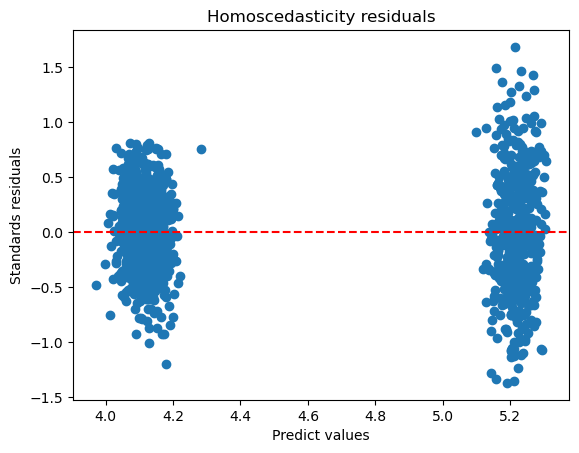

In [23]:
# Plot of the scatterplot between predicted values and residuals
plt.scatter(predictions, residus)
plt.xlabel("Predict values")
plt.ylabel("Standards residuals")

# Add of a horizontal line at y=0 to help visualise homoscedasticity
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Homoscedasticity residuals")
plt.show()

#### Normality test

In [24]:
# Normality test of residuals
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9936248064041138, pvalue=6.20942773821298e-06)

The test statistic is approximately 0.9936, indicating that the residuals appear to be relatively close to a normal distribution. However, the associated p-value is very low (6.20e-06), suggesting strong evidence in favour of rejecting the null hypothesis. In other words, there are indications that the residuals do not follow a normal distribution.

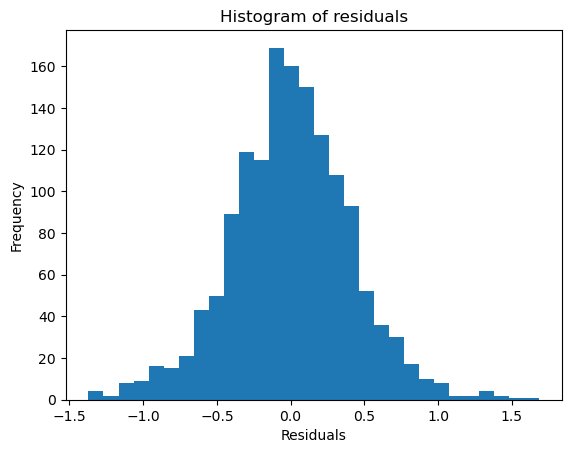

In [25]:
# Histogram of residuals
plt.hist(residus, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of residuals")
plt.show()

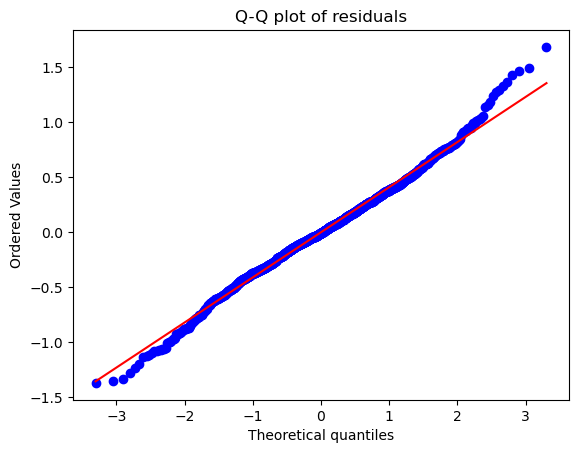

In [26]:
# Q-Q plot of residuals
stats.probplot(residus, dist="norm", plot=plt)
plt.title("Q-Q plot of residuals")
plt.show()

#### VIF

In [27]:
# Calculation of Variance Inflation Factors (VIF)
X_no_const = X.drop('const', axis=1)
vif_data = pd.DataFrame()
vif_data['features'] = X_no_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.values.shape[1])]
print(vif_data)

     features       VIF
0  is_genuine  2.622757
1   margin_up  2.622757


In [28]:
# Calculation of VIF for explanatory variables
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007748]

## 3. Clustering<a class="anchor" id="chapitre3"></a>

### 3.1 Creation of a DataFrame train and test<a class="anchor" id="section3.1"></a>

In [29]:
# Separation of explanatory variables (X) and target variable (y)
X = billet_reglin_multiple.drop('is_genuine', axis=1)
y = billet_reglin_multiple['is_genuine']

In [30]:
# Division of data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Init StandardScaler
scaler = StandardScaler()

In [32]:
# Normalisation of training data
X_train_scaled = scaler.fit_transform(X_train)

In [33]:
# Normalisation of test data using training data scaler parameters
X_test_scaled = scaler.transform(X_test)

#### Data Split

In [34]:
# Recovery of X_train values
X_values = X_train.values
X_values[:5]  # Displays the first five lines

array([[172.28, 104.62, 103.8 ,   4.08,   3.08, 113.26],
       [171.9 , 104.5 , 103.49,   4.08,   2.82, 113.5 ],
       [171.63, 104.33, 104.61,   4.88,   3.35, 112.16],
       [172.06, 104.28, 104.31,   5.61,   3.27, 111.61],
       [172.1 , 104.42, 103.6 ,   4.18,   2.89, 113.32]])

In [35]:
# Retrieve X_train indexes
index = X_train.index

In [36]:
# Retrieve column names from X_train
features = X_train.columns

#### Scaling

In [37]:
# Displays descriptive statistics (mean and standard deviation) for columns
pd.DataFrame(X_train_scaled).describe().round(2).iloc[1:3:, : ]

,0,1,2,3,4,5
mean,0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


### 3.2 PCA<a class="anchor" id="section3.2"></a>

In [38]:
# Definition of the number of principal components
n_components = 6

In [39]:
# Init principal component analysis (PCA)
pca = PCA(n_components=n_components)

In [40]:
# Adjustment of PCA to standardised data
pca.fit(X_train_scaled)

PCA(n_components=6)

#### Variance and scree diagram

In [41]:
# Calculate the percentage of variance explained by each principal component
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([42.97, 16.97, 13.19, 11.82,  9.91,  5.13])

In [42]:
# Calculate the cumulative sum of the variance percentages
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

In [43]:
# Generate a list of values from 1 to n_components
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

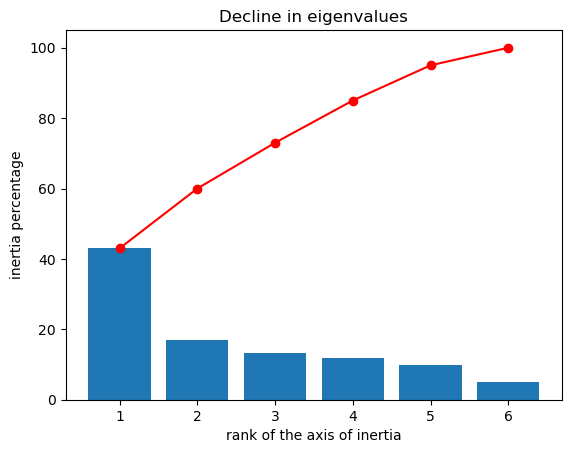

In [44]:
# Create a bar chart for the eigenvalues
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c="red", marker='o') # Add the cumulative curve in red
plt.xlabel("rank of the axis of inertia")
plt.ylabel("inertia percentage")
plt.title("Decline in eigenvalues")
plt.show(block=False)

#### Components

In [45]:
# Recovers the principal components
pcs = pca.components_
pcs

array([[-0.07568831,  0.32719689,  0.39489061,  0.50391315,  0.43996636,
        -0.53270632],
       [ 0.94044483,  0.30005811,  0.1272481 , -0.07708905, -0.0219336 ,
         0.05397016],
       [-0.30554513,  0.87573549, -0.02400224, -0.14158439, -0.28568043,
         0.19363362],
       [-0.08724544, -0.18023691,  0.8828887 , -0.09772448, -0.38760774,
         0.14359872],
       [ 0.09392806, -0.05922626, -0.21614443,  0.58427774, -0.72946267,
        -0.25972118],
       [ 0.00653714, -0.00126094,  0.032899  ,  0.60757891,  0.20488939,
         0.76664303]])

In [46]:
# Creates a DataFrame from the principal components
pcs = pd.DataFrame(pcs)

In [47]:
# Associates column names
pcs.columns = features

# Associate formatted row names "F1", "F2", ...
pcs.index = [f"F{i}" for i in x_list]

# Round values to two decimal places
pcs.round(2)

# Transposes the principal components DataFrame
pcs.T

,F1,F2,F3,F4,F5,F6
diagonal,-0.075688,0.940445,-0.305545,-0.087245,0.093928,0.006537
height_left,0.327197,0.300058,0.875735,-0.180237,-0.059226,-0.001261
height_right,0.394891,0.127248,-0.024002,0.882889,-0.216144,0.032899
margin_low,0.503913,-0.077089,-0.141584,-0.097724,0.584278,0.607579
margin_up,0.439966,-0.021934,-0.285680,-0.387608,-0.729463,0.204889
length,-0.532706,0.053970,0.193634,0.143599,-0.259721,0.766643


#### Correlation matrix

<AxesSubplot:>

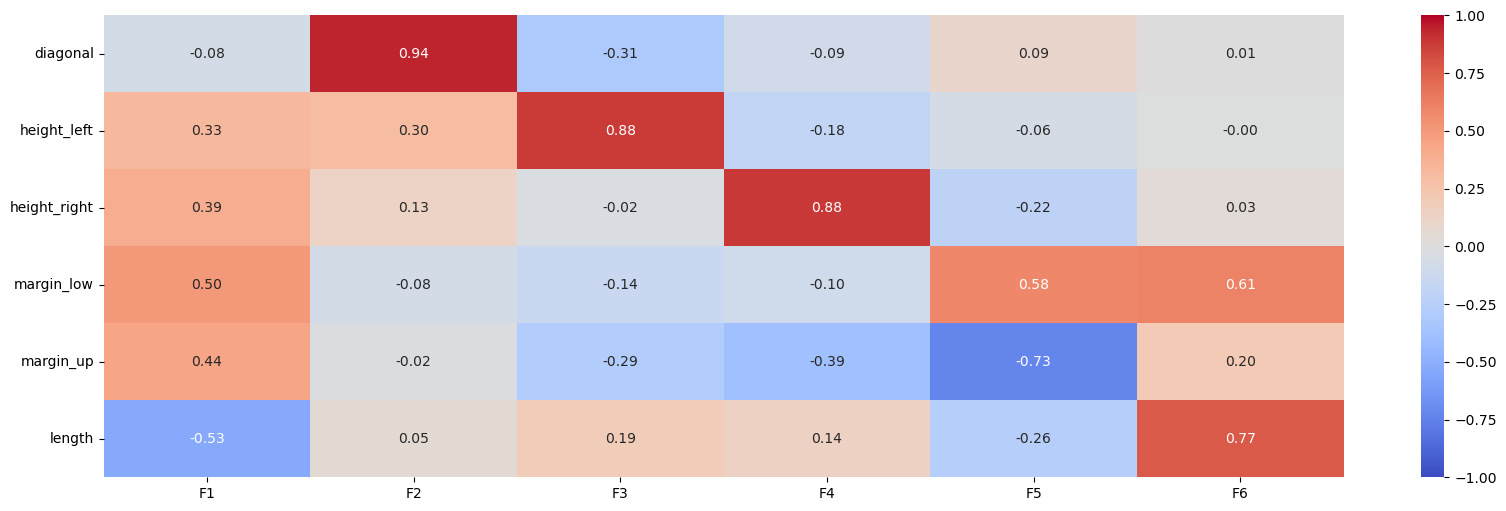

In [48]:
# Create a figure
fig, ax = plt.subplots(figsize=(20, 6))

# Draw a heatmap of the principal components
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### Projection

In [49]:
# Transform training data into principal components
X_train_proj = pca.transform(X_train_scaled)
X_train_proj[:5]

array([[-0.36374221,  1.61667059,  1.70001342, -0.49942035, -0.23035626,
         0.06550231],
       [-1.4149446 ,  0.25260361,  2.12504577, -0.684538  ,  0.63005729,
         0.00613063],
       [ 2.25306613, -0.53230498,  0.69602776,  1.30079503, -0.72399532,
         0.15154781],
       [ 2.46957863,  0.50514436, -0.03431251,  0.33240188,  0.67788002,
         0.25338789],
       [-1.09947609,  0.79845953,  1.53795986, -0.55707094,  0.55556856,
         0.01891211]])

In [50]:
# Transform test data into principal components
X_test_proj = pca.transform(X_test_scaled)
X_test_proj[:5]

array([[ 1.79402557,  0.70186647, -1.45103239, -0.22560574,  0.01802578,
        -0.49572184],
       [ 2.25414158, -0.64187351,  0.66495172,  0.77129772,  0.42431415,
         0.86385521],
       [-1.52467215, -1.84578959, -0.66572913,  0.03088397,  0.3575083 ,
        -0.54221126],
       [-1.42505131,  0.57597783, -1.25981162, -0.92878091,  0.01494977,
        -0.1477144 ],
       [-1.99118413,  0.36690878, -0.26425507, -0.20926279,  1.07507218,
        -0.43471327]])

### 3.3 Correlation graph<a class="anchor" id="section3.3"></a>

In [51]:
x, y = 0,1

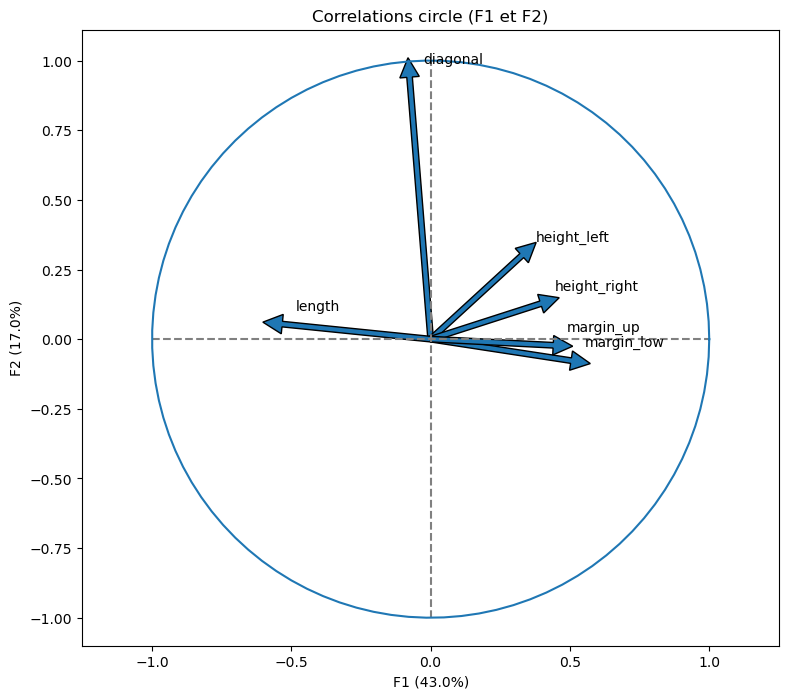

In [52]:
# Creates a figure and an axis for the graph
fig, ax = plt.subplots(figsize=(9, 8))

# Loops through the principal components
for i in range(0, pca.components_.shape[1]):
    # Draws an arrow from the origin to the coordinates of the principal component
    ax.arrow(0,
             0, 
             pca.components_[0, i],
             pca.components_[1, i],
             head_width=0.07,
             head_length=0.07, 
             width=0.02)

    # Adds the feature name next to the arrow
    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i],
             ha='left',
             va='baseline')
    
# Draw horizontal and vertical dashed lines
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# Add labels to the axes, with the percentage of inertia explained
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

# Add a title to the graph
plt.title("Correlations circle (F{} et F{})".format(x+1, y+1))

# Draw a unit circle to indicate the unit
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))

# Maintain equal proportions on the axes
plt.axis('equal')

# Display the graph
plt.show(block=False)

### 3.4 Projection<a class="anchor" id="section3.4"></a>

In [53]:
def display_factorial_planes(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[6,4], marker=".", marker_size=20, legend_title=None):
    """
    Displays factorial plans based on projected data.

    Args:
        X_projected (array-like): The projected data.
        x_y (tuple): The dimensions to be displayed (e.g. (0, 1) for the first two dimensions).
        pca (PCA, optional): The PCA object for calculating percentages of variance. Defaults to None.
        labels (list, optional): The labels of the points. Defaults to None.
        clusters (array-like, optional): Clusters. Defaults to None.
        alpha (float, optional): Transparency of points. Defaults to 1.
        figsize (list, optional): The size of the figure. Defaults to [6,4].
        marker (str, optional): The marker style. Defaults to ".".
        marker_size (int, optional): The marker size. Defaults to 20.
        legend_title (str, optional): The legend title. Defaults to None.
    """
    # Transform X_projected to a np.array
    X_ = np.array(X_projected)

    # Define the figure size
    if not figsize: 
        figsize = (7,6)

    # Labels are managed
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # Check the axis variable 
    if not len(x_y) == 2 : 
        raise AttributeError("2 axes sont demandés")   
    if max(x_y) >= X_.shape[1] : 
        raise AttributeError("La variable axis n'est pas correcte")

    # Define x and y 
    x, y = x_y

    # Init the figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Check the clusters
    c = None if clusters is None else clusters

    # The points    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, alpha=alpha, marker=marker, s=marker_size)

    # If the pca variable has been supplied, you can calculate the % variance of each axis 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1 = v2 = ''

    # Name the axes, with the percentage of inertia explained
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Values x max and y max
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    # Limit for x and y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Display horizontal and vertical lines
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color='grey', alpha=0.8)

    # Display point labels
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:, [x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center', va='bottom')

    # Title and display
    plt.title(f"Individuals projection (on F{x+1} and F{y+1})")
    plt.show()

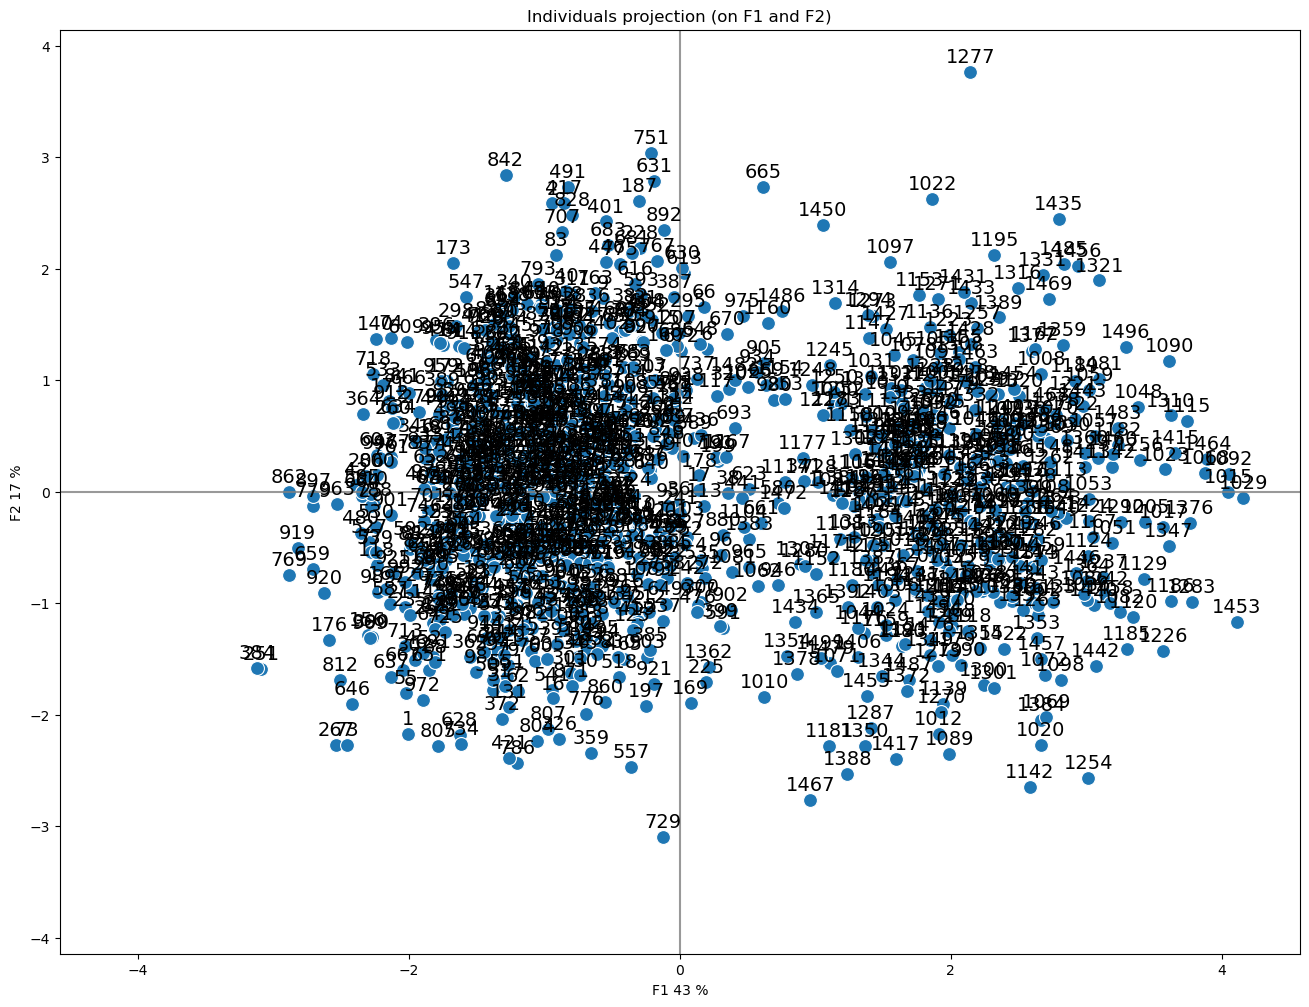

In [54]:
x_y = [0,1]
display_factorial_planes(X_train_proj, x_y, pca, labels=index, figsize=(16,12), marker="o", marker_size=100)

### 3.5 K-means<a class="anchor" id="section3.5"></a>

#### Elbow method

In [55]:
# Initialise the list to store inertia
intertia = []

In [56]:
# List of k values
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [57]:
# Loop to test different values of k
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_train_scaled) 
  intertia.append(kmeans.inertia_)

In [58]:
intertia

[7200.0,
 4652.48680221679,
 4075.248490713504,
 3731.253688684481,
 3485.3262566531757,
 3279.69474277489,
 3115.0790014982254,
 2973.347211211715,
 2848.163285229364]

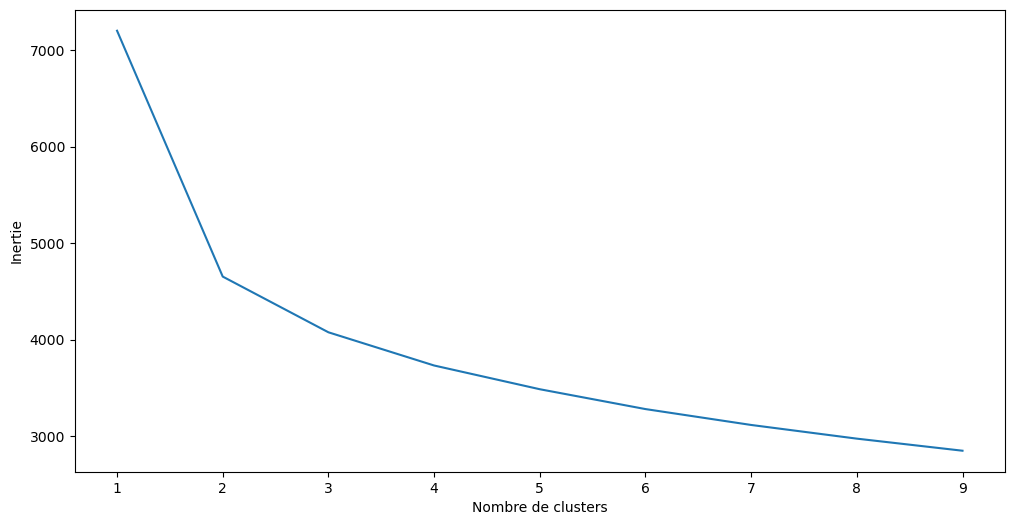

In [59]:
# Create a figure
fig, ax = plt.subplots(1,1,figsize=(12,6))

# Define the labels
ax.set_ylabel("Inertie")
ax.set_xlabel("Nombre de clusters")

# Draw the courb
ax = plt.plot(k_list, intertia)

#### K-Means method

In [60]:
# Train KMeans with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=2)

In [61]:
# Obtaining cluster labels
klabel = kmeans.labels_

In [62]:
# Add labels to the dataframe
X_train['cluster'] = kmeans.labels_
X_train

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
382,172.28,104.62,103.80,4.08,3.08,113.26,1
538,171.90,104.50,103.49,4.08,2.82,113.50,1
1493,171.63,104.33,104.61,4.88,3.35,112.16,0
1112,172.06,104.28,104.31,5.61,3.27,111.61,0
324,172.10,104.42,103.60,4.18,2.89,113.32,1
...,...,...,...,...,...,...,...
1130,171.56,104.29,104.19,5.23,3.63,112.94,0
1294,172.40,104.27,104.18,4.92,3.17,111.79,0
860,171.38,103.83,103.99,4.44,3.12,113.48,1
1459,171.78,104.31,103.82,6.19,3.25,111.14,0


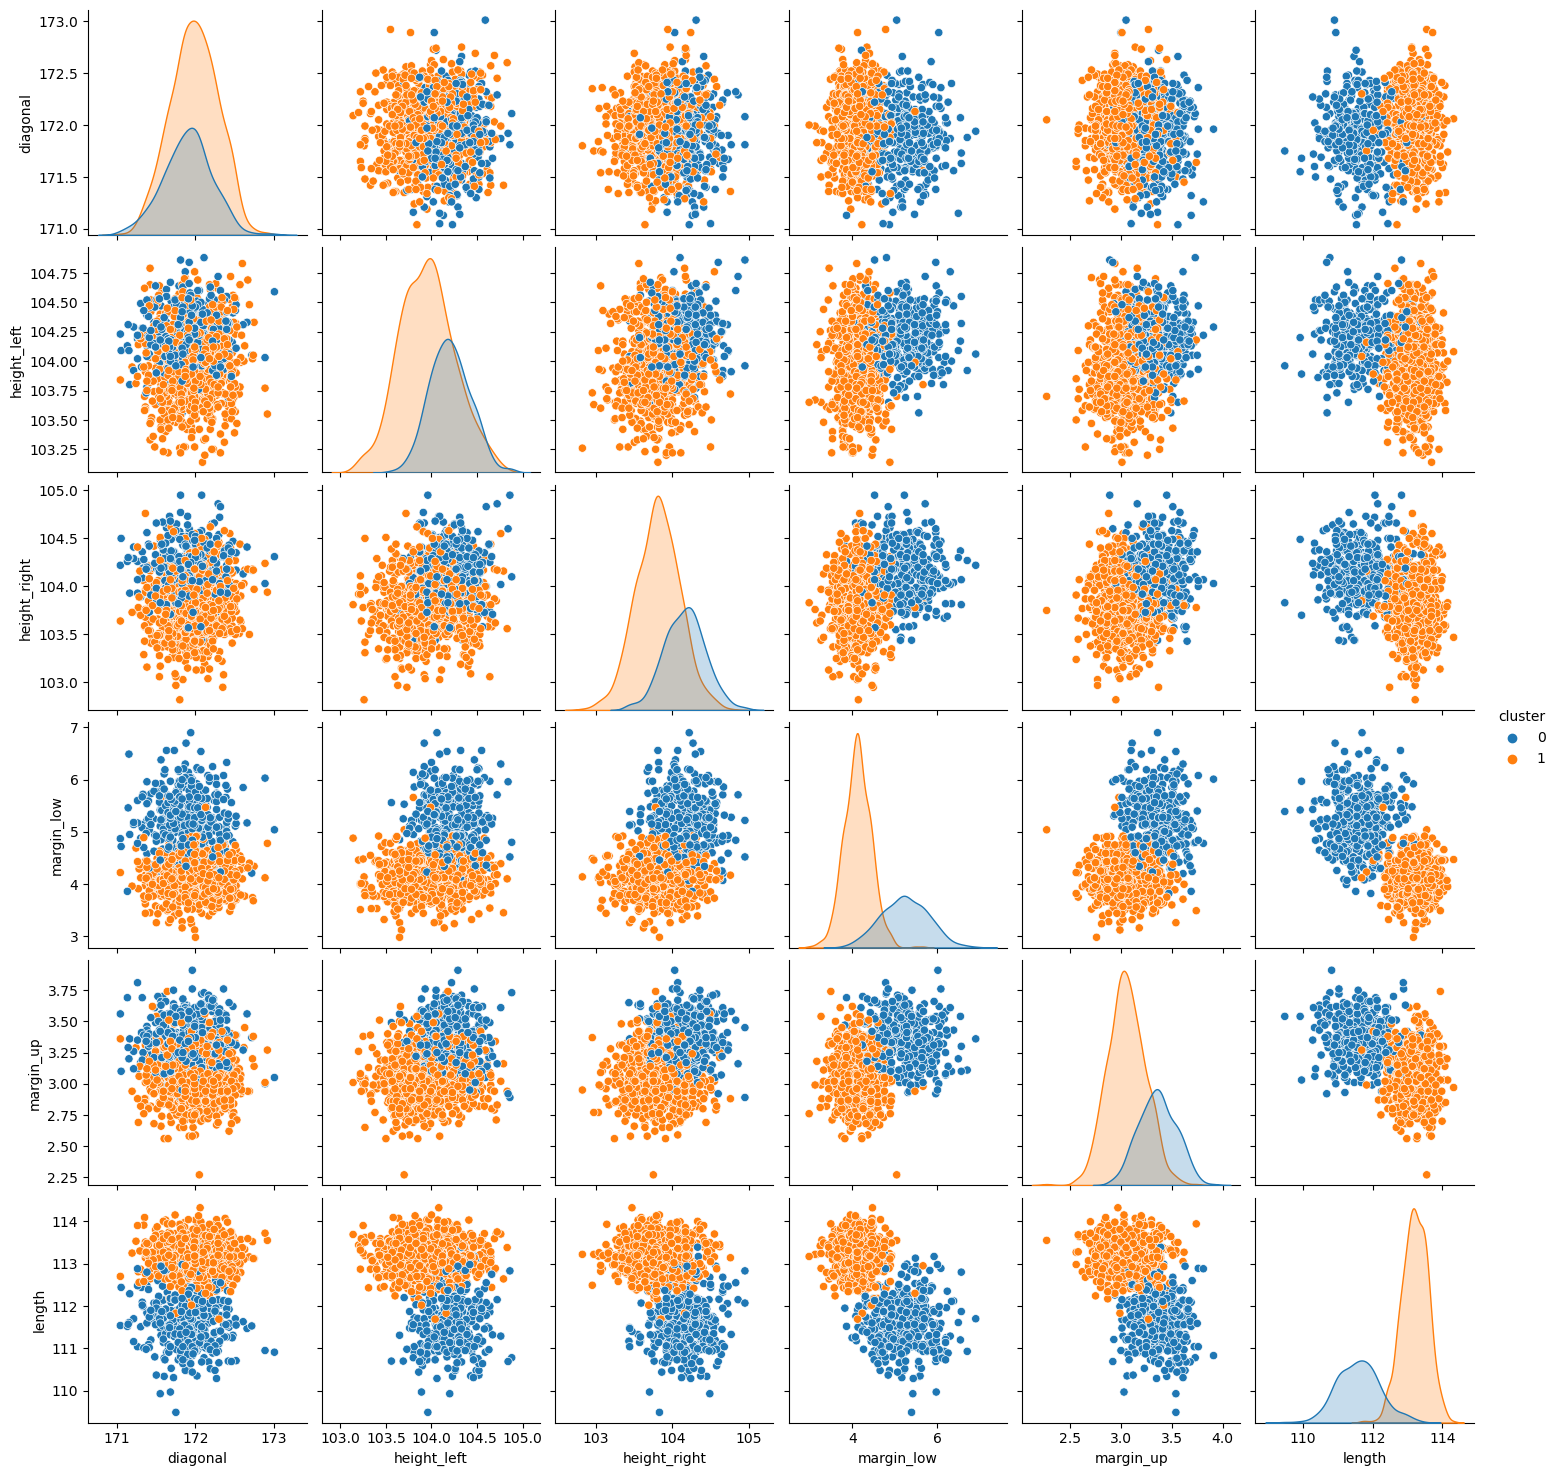

In [63]:
# Display the pair of plots using the clusters as colour labels
sns.pairplot(X_train, hue="cluster")

#### Centroïds

In [64]:
# Calculate centroids
centroidkmeans = round(X_train.groupby('cluster').mean(), 3)
centroidkmeans

,diagonal,height_left,height_right,margin_low,margin_up,length
cluster,,,,,,
0,171.899,104.199,104.157,5.228,3.356,111.598
1,171.984,103.951,103.809,4.117,3.055,113.202


In [65]:
# Transforming centroids with the scaler
centroidkmeans_scaled = scaler.transform(centroidkmeans)
centroidkmeans_scaled

array([[-0.18895398,  0.5601604 ,  0.72661051,  1.14803976,  0.88498048,
        -1.24266556],
       [ 0.08764341, -0.26351535, -0.34012371, -0.53844065, -0.41400745,
         0.5825303 ]])

[Text(0.5, 0, 'diagonal'),
 Text(1.5, 0, 'height_left'),
 Text(2.5, 0, 'height_right'),
 Text(3.5, 0, 'margin_low'),
 Text(4.5, 0, 'margin_up'),
 Text(5.5, 0, 'length')]

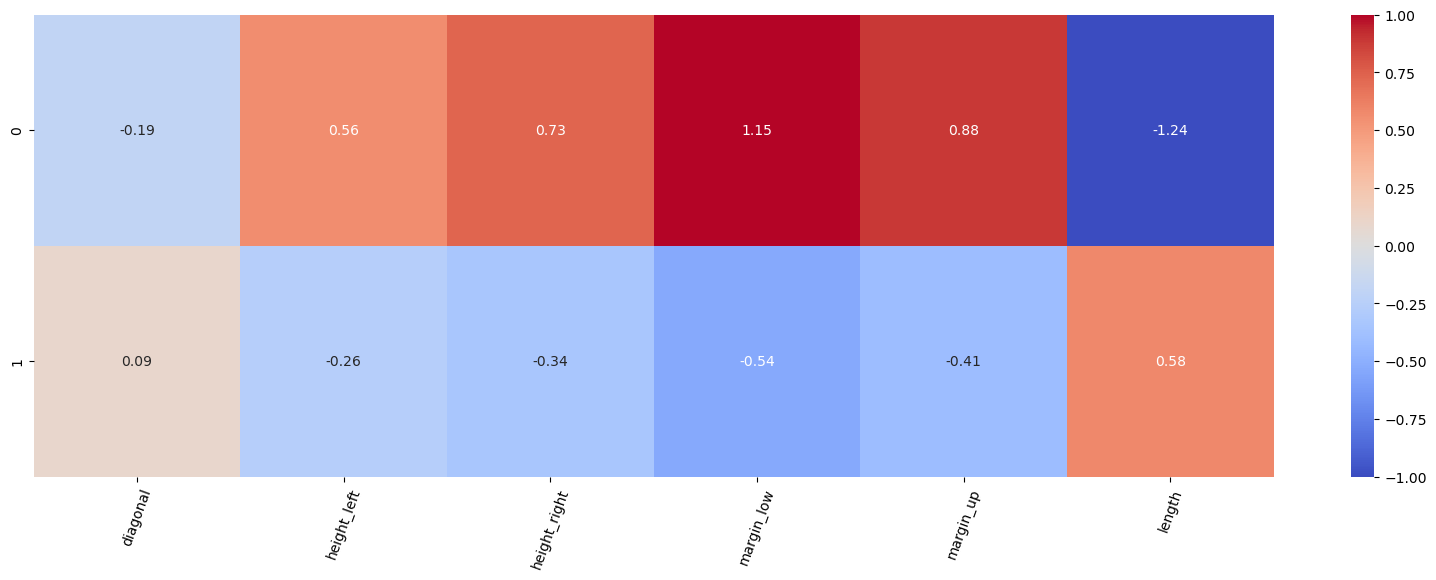

In [66]:
# Recovery of column names
columns = centroidkmeans.columns

# Create a heatmap to display the centroids
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(centroidkmeans_scaled, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
ax.set_xticklabels(columns, rotation=70)

In [67]:
# Transformation des centroids avec PCA
centroid_pca = pca.transform(centroidkmeans_scaled)

In [68]:
# Create a color map for clusters
color_map = {0: 'red', 1: 'blue'}
colors = [color_map[label] for label in X_train['cluster']]

In [69]:
# List of colors
list_color = ['red', 'blue']

## 4. Visualisation<a class="anchor" id="chapitre4"></a>

In [70]:
# Creation of a DataFrame for PCA projections of the training set
X_train_proj = pd.DataFrame(X_train_proj, columns=["F1", "F2", "F3", "F4", "F5", "F6"])
X_train_proj[:5]

,F1,F2,F3,F4,F5,F6
0,-0.363742,1.616671,1.700013,-0.499420,-0.230356,0.065502
1,-1.414945,0.252604,2.125046,-0.684538,0.630057,0.006131
2,2.253066,-0.532305,0.696028,1.300795,-0.723995,0.151548
3,2.469579,0.505144,-0.034313,0.332402,0.677880,0.253388
4,-1.099476,0.798460,1.537960,-0.557071,0.555569,0.018912


In [71]:
# Creation of a DataFrame for PCA projections of the test set
X_test_proj = pd.DataFrame(X_test_proj, columns=["F1", "F2", "F3", "F4", "F5", "F6"])
X_test_proj[:5]

,F1,F2,F3,F4,F5,F6
0,1.794026,0.701866,-1.451032,-0.225606,0.018026,-0.495722
1,2.254142,-0.641874,0.664952,0.771298,0.424314,0.863855
2,-1.524672,-1.845790,-0.665729,0.030884,0.357508,-0.542211
3,-1.425051,0.575978,-1.259812,-0.928781,0.014950,-0.147714
4,-1.991184,0.366909,-0.264255,-0.209263,1.075072,-0.434713


Text(0, 0.5, 'F2')

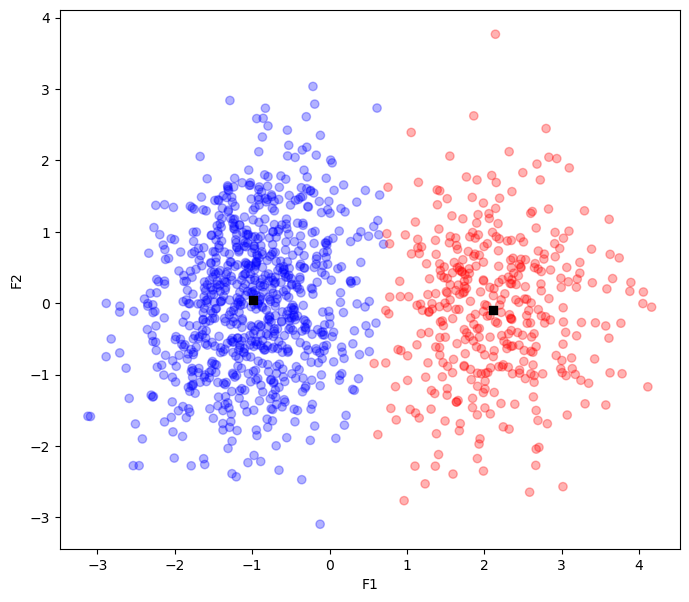

In [72]:
# Initialise the figure to display the projections
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

# Display training points with cluster colours
ax.scatter(X_train_proj.iloc[:, 0], X_train_proj.iloc[:, 1], c=colors, cmap="Set1", alpha=0.3)

# Displays centroids
ax.scatter(centroid_pca[:, 0], centroid_pca[:, 1], marker="s", c='black')

# Add the axes labels
ax.set_xlabel("F1")
ax.set_ylabel("F2")

### 4.1 Confusion matrix : k-means<a class="anchor" id="section4.1"></a>

In [73]:
# Init K-means model with 2 clusters
kmeans2 = KMeans(n_clusters=2, random_state=42)

# Train the training set
kmeans2.fit(X_train_scaled)

KMeans(n_clusters=2, random_state=42)

In [74]:
# Prediction on training data
y_pred_kmean = kmeans2.predict(X_train_scaled)

Accuracy: 0.015833333333333335


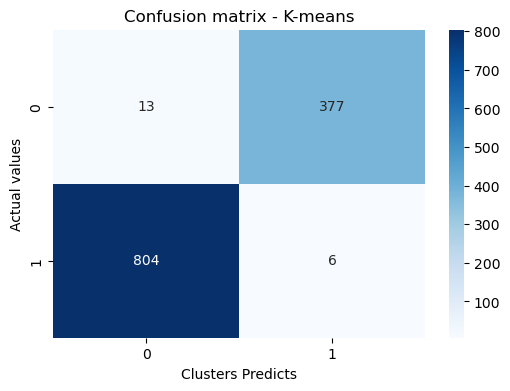

In [75]:
# Calculate the confusion matrix and accuracy
confusion_mat = confusion_matrix(y_train, y_pred_kmean)
accuracy_kmean = accuracy_score(y_train, y_pred_kmean)

# Display the accuracy and the confusion matrix
print("Accuracy:", accuracy_kmean)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clusters Predicts')
plt.ylabel('Actual values')
plt.title('Confusion matrix - K-means')
plt.show()

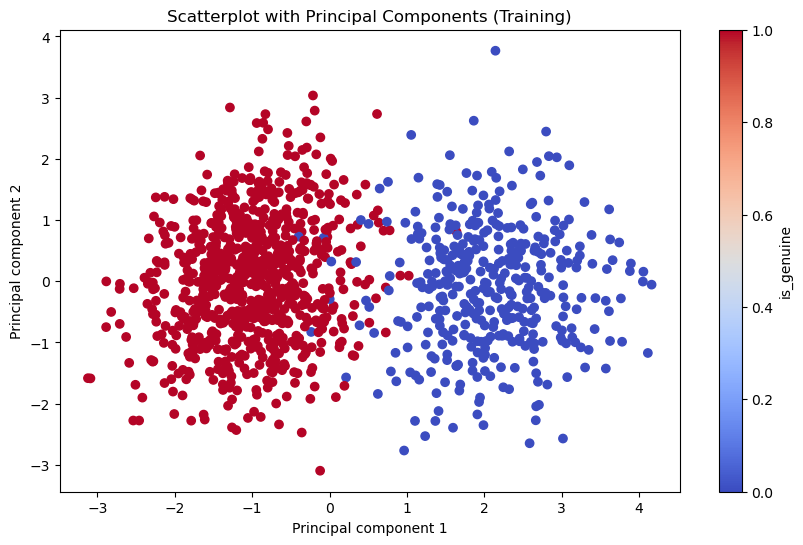

In [76]:
# Display of scatterplot with principal components for training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_proj['F1'], X_train_proj['F2'], c=y_train, cmap='coolwarm')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Scatterplot with Principal Components (Training)')
plt.colorbar(label='is_genuine')
plt.show()

In [77]:
# Prediction on test dataset
y_pred_kmean = kmeans2.predict(X_test_scaled)

Accuracy: 0.01


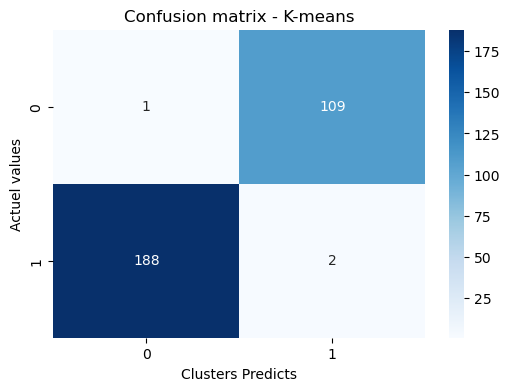

In [78]:
# Calculate the confusion matrix and accuracy
confusion_mat = confusion_matrix(y_test, y_pred_kmean)
accuracy_kmean = accuracy_score(y_test, y_pred_kmean)

# Display the accuracy and the confusion matrix
print("Accuracy:", accuracy_kmean)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clusters Predicts')
plt.ylabel('Actuel values')
plt.title('Confusion matrix - K-means')
plt.show()

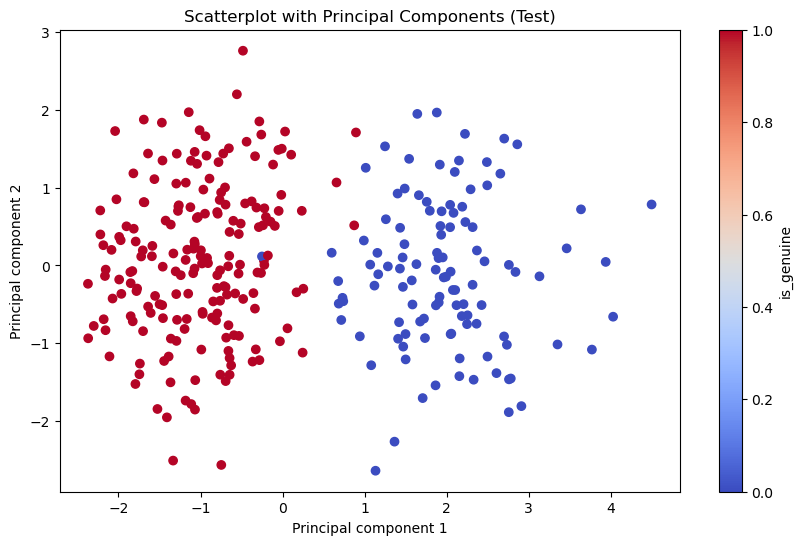

In [79]:
# Display of scatterplot with principal components for test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test_proj['F1'], X_test_proj['F2'], c=y_test, cmap='coolwarm')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Scatterplot with Principal Components (Test)')
plt.colorbar(label='is_genuine')
plt.show()

## 5. Logistic regression<a class="anchor" id="chapitre5"></a>

### 5.1 Predictions<a class="anchor" id="section5.1"></a>

In [80]:
# Init and training of the logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [81]:
# Predictions on test data
y_pred = logit_model.predict(X_test_scaled)

### 5.2 Accuracy<a class="anchor" id="section5.2"></a>

In [82]:
# Calculation of accuracy, confusion matrix and classification ratio
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the accuracy
print("Accuracy:", accuracy)

# Display the confusion matrix
print("Confusion Matrix:\n", confusion_mat)

# Display the classification report
print("Classification Report:\n", classification_rep)

Accuracy: 0.9933333333333333
Confusion Matrix:
 [[108   2]
 [  0 190]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



### 5.3 Confusion matrix<a class="anchor" id="section5.3"></a>

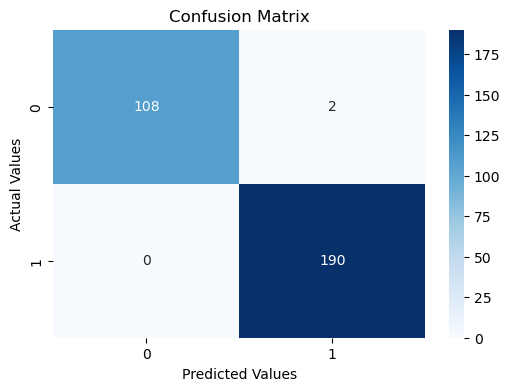

In [83]:
# Display the confusion matrix as a plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

----------------------------------------------------------------------------------------------------------------------

## 6. TEST<a class="anchor" id="chapitre6"></a>

----------------------------------------------------------------------------------------------------------------------

In [84]:
# Saving the logistic regression model and scaling it
joblib.dump(logit_model, 'reg_logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [85]:
# Load the logistic regression model
model_path = 'reg_logistic_model.pkl'
reg_logistic_model = joblib.load(model_path)

# Load the scaler
scaler_path = 'scaler.pkl'
scaler = joblib.load(scaler_path)

# Function to predict new tickets
def predict_new_billets(new_data):
    
    # Normalise new data
    new_data_scaled = scaler.transform(new_data)

    # Predict with logistic regression model
    predictions = reg_logistic_model.predict(new_data_scaled)
    
    # Convert predictions to 'True' or 'False
    predictions_binary = ['Vrai' if pred == 1 else 'Faux' for pred in predictions]
    
    # Add predictions as a new column in the DataFrame
    new_data_with_predictions = new_data.copy()
    new_data_with_predictions['Predictions'] = predictions_binary

    return new_data_with_predictions

print(predictions)

0       4.150546
1       4.129352
2       4.139949
3       4.125114
4       4.025502
          ...   
1495    5.271358
1496    5.212015
1497    5.214134
1498    5.192940
1499    5.212015
Length: 1463, dtype: float64


In [86]:
# Load the new data
new_billets = pd.read_csv('/Users/antoinebergounhe/Desktop/Openclassroom/Projet 10/billets_production.csv')

In [87]:
# Select the necessary columns (assuming 'id' is the column to exclude)
test = new_billets.drop('id', axis=1)

In [88]:
# Normalise the new data
new_data_scaled = scaler.transform(test)

# Use the function to make predictions
predictions = predict_new_billets(test)

In [89]:
# Use the function to make predictions
predictions = predict_new_billets(test)
predictions

,diagonal,height_left,height_right,margin_low,margin_up,length,Predictions
0,171.76,104.01,103.54,5.21,3.30,111.42,Faux
1,171.87,104.17,104.13,6.00,3.31,112.09,Faux
2,172.00,104.58,104.29,4.99,3.39,111.57,Faux
3,172.49,104.55,104.34,4.44,3.03,113.20,Vrai
4,171.65,103.63,103.56,3.77,3.16,113.33,Vrai
